## Lenet

Lenet基本算是最早的CNN了，其中很多设定仍然沿用至今，例如Pooling层的应用。
Lenet的结构一张图就可解释清楚,其中卷积大小都是$5*5$,stride=1,padding='valid'
![Lenet](lenet.jpg)
接下来给出keras的实现版本,并用fashion-mnist来测试模型的效果

In [15]:
import numpy as np

np.random.seed(0)

from keras import layers
from keras import models
from keras import datasets
from keras import utils

import matplotlib.pyplot as plt

In [4]:
# load fashion-mnist
(x_train,y_train),(x_test, y_test) = datasets.fashion_mnist.load_data()

# normalization
x_train = x_train.astype('float') / 255.0
x_test = x_test.astype('float') / 255.0
# expand dim for cnn
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

# one-hot encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

print('x_train shape:{}, y_train shape:{}'.format(x_train.shape, y_train.shape))
print('x_test shape:{}, y_test shape:{}'.format(x_test.shape, y_test.shape))

x_train shape:(60000, 28, 28, 1), y_train shape:(60000, 10)
x_test shape:(10000, 28, 28, 1), y_test shape:(10000, 10)


In [10]:
# build Lenet
# 下面的实现中，结构与原来的一样，但是参数稍微做了修改
def build_Lenet():
    model = models.Sequential()
    
    # conv-1
    model.add(layers.Conv2D(16, 5, strides=(1,1), activation='relu', input_shape=(28,28,1)))
    # pooling-1
    model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
    
    # conv-2
    model.add(layers.Conv2D(32, 5, strides=(1,1), activation='relu'))
    # pooling-2
    model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model
    

In [11]:
model = build_Lenet()
utils.plot_model(model, to_file='Lenet_model.png', show_shapes=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

我们的模型大概长这样![Lenet_model](Lenet_model.png)

In [12]:
# training
epochs = 20
batch_size = 64
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 7s 147us/step - loss: 0.5720 - acc: 0.7889 - val_loss: 0.4053 - val_acc: 0.8501
Epoch 2/20
48000/48000 [==============================] - 4s 79us/step - loss: 0.3657 - acc: 0.8668 - val_loss: 0.3528 - val_acc: 0.8758
Epoch 3/20
48000/48000 [==============================] - 4s 80us/step - loss: 0.3114 - acc: 0.8857 - val_loss: 0.2993 - val_acc: 0.8918
Epoch 4/20
48000/48000 [==============================] - 4s 80us/step - loss: 0.2798 - acc: 0.8972 - val_loss: 0.2880 - val_acc: 0.8965
Epoch 5/20
48000/48000 [==============================] - 4s 80us/step - loss: 0.2552 - acc: 0.9058 - val_loss: 0.2722 - val_acc: 0.8988
Epoch 6/20
48000/48000 [==============================] - 4s 81us/step - loss: 0.2353 - acc: 0.9116 - val_loss: 0.2756 - val_acc: 0.9005
Epoch 7/20
48000/48000 [==============================] - 4s 81us/step - loss: 0.2199 - acc: 0.9165 - val_loss: 0.2765 - val_ac

In [18]:
def plot_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss)+1)
    
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
def plot_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc)+1)

    plt.figure()
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

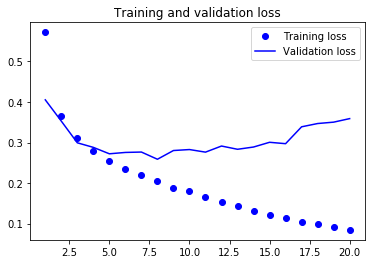

In [19]:
plot_loss(history)

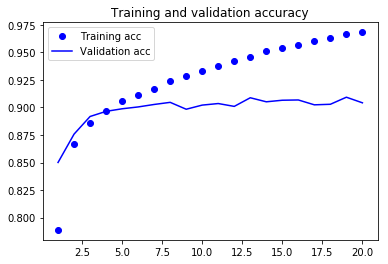

In [20]:
plot_acc(history)

In [21]:
# test
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 46us/step


[0.3797126607656479, 0.9018]

## 结论
+ Lenet 定义了CNN的基本组件，是CNN的鼻祖
+ 从训练结果来看，明显过拟合了，但是准确率仍然能达到90%左右，毕竟这是在20年前提出的模型，对于这样的结果，应该是相当满意的